# Assignment

In this assignment, you'll continue working with the U.S. Education Dataset from Kaggle. The data gives detailed state level information on several facets of education on an annual basis. 

Don't forget to apply the most suitable missing value filling techniques from the previous checkpoint to the data. Provide the answers to the following only after you've addressed missing values!

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

In [1]:
# Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [2]:
# Replace missing values with interpolation since data is time series

education2_df = education_df.copy()

null_val = ['ENROLL','TOTAL_REVENUE','FEDERAL_REVENUE','STATE_REVENUE','LOCAL_REVENUE',
           'TOTAL_EXPENDITURE','INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE',
           'OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE','GRADES_PK_G','GRADES_KG_G',
           'GRADES_4_G','GRADES_8_G','GRADES_12_G','GRADES_1_8_G','GRADES_9_12_G','GRADES_ALL_G',
           'AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']

for col in null_val:
    education2_df.loc[:, col].interpolate(inplace=True)

#### 1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

Both total revenue and total expenditure have outliers that would skew the data to the right. 

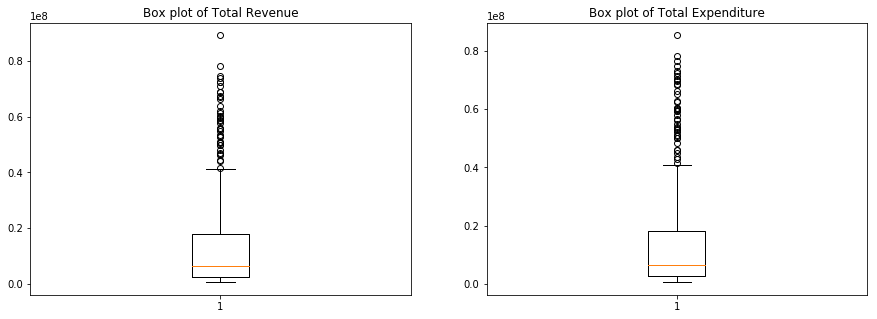

In [3]:
# Plot total revenue and total expenditure

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(education2_df["TOTAL_REVENUE"])
plt.title("Box plot of Total Revenue")

plt.subplot(1,2,2)
plt.boxplot(education2_df["TOTAL_EXPENDITURE"])
plt.title("Box plot of Total Expenditure")
plt.show()

#### 2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

In [4]:
from scipy.stats.mstats import winsorize
# We apply one-way winsorization to the highest end
# of the value distribution. As we have a lot of extreme
# values, we set the values of the outliers to the 
# value of the 90th percentile. 
winsorized_revenue = winsorize(education2_df["TOTAL_REVENUE"], (0, 0.05))

winsorized_expenditure = winsorize(education2_df["TOTAL_EXPENDITURE"], (0, 0.05))


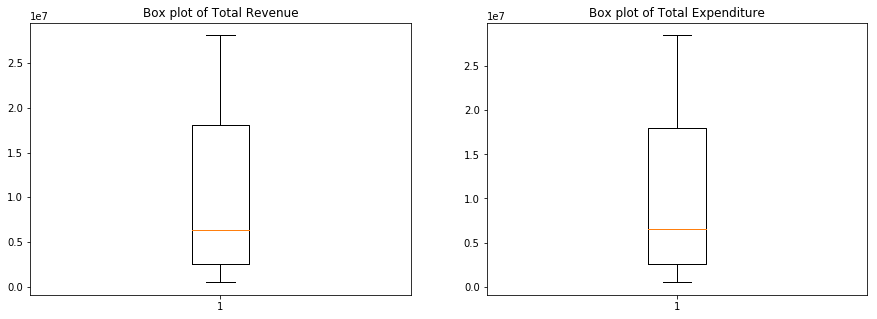

In [5]:
# Plot log total revenue and total expenditure

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(winsorized_revenue)
plt.title("Box plot of Total Revenue")

plt.subplot(1,2,2)
plt.boxplot(winsorized_expenditure)
plt.title("Box plot of Total Expenditure")
plt.show()


#### 3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

In [6]:
# Create budget deficit

budget_deficit = education2_df['TOTAL_EXPENDITURE'] - education2_df['TOTAL_REVENUE']

Text(0.5,1,'Box plot of Budget Deficit')

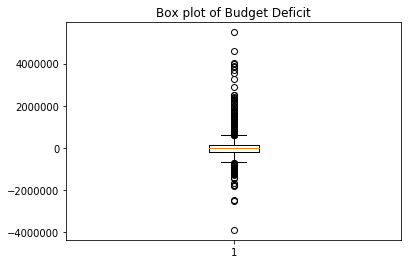

In [7]:
# Plot budget deficit 

plt.boxplot(budget_deficit)
plt.title("Box plot of Budget Deficit")

There appears to be outliers on both ends of the box plot tails. We will use the winsorization method to cap the values of outliers on both ends and set the __threshold__ as 0.05.

In [8]:
# Winsorized outliers

winsorized_budget = winsorize(budget_deficit, (0.05, 0.05))

Text(0.5,1,'Box plot of budget deficit')

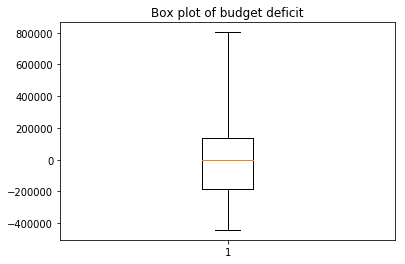

In [9]:
# Plot winsorized budget 

plt.boxplot(winsorized_budget, whis = 5)
plt.title("Box plot of budget deficit")

#### 4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

In [10]:
# Create second budget deficit

budget2_deficit = winsorized_expenditure - winsorized_revenue

Text(0.5,1,'Box plot of second budget deficit')

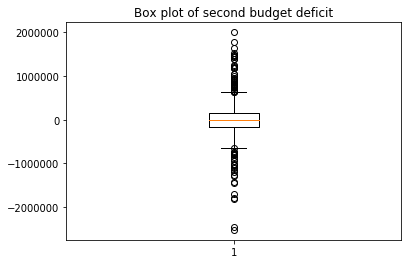

In [11]:
# Plot second budget deficit 

plt.boxplot(budget2_deficit)
plt.title("Box plot of second budget deficit")

In [12]:
# Winsorized outliers

winsorized_budget2 = winsorize(budget2_deficit, (0.05, 0.05))

Text(0.5,1,'Box plot of second budget deficit')

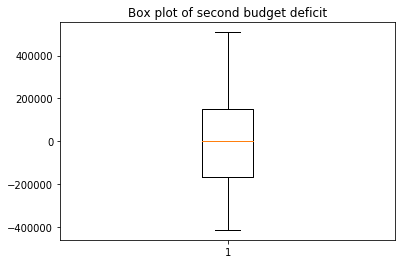

In [13]:
# Plot winsorized budget 

plt.boxplot(winsorized_budget2)
plt.title("Box plot of second budget deficit")

#### 5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

In [14]:
# Create dataframe to compare statistics 

pd.DataFrame({'orginal budget': budget_deficit,'winsorized budget Q3': winsorized_budget, 
             'winsorized budget Q4': winsorized_budget2}).describe()

,orginal budget,winsorized budget Q3,winsorized budget Q4
count,1.492000e+03,1492.000000,1492.000000
mean,3.209622e+04,5852.697051,-5979.659517
std,5.607748e+05,315970.963721,268064.378117
min,-3.897129e+06,-442351.000000,-414013.000000
25%,-1.876285e+05,-187628.500000,-168423.500000
50%,5.355000e+02,535.500000,3443.500000
75%,1.368148e+05,136814.750000,152551.500000
max,5.487742e+06,803208.000000,509360.000000


When comparing winsorized budget from question 3 and 4, the measures of central tendency all differ. For instance, the mean from question 3 is approximately 5,853 while question 4's mean is around -5,980. The medians differ as well.

#### 6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

I would recommend the method used in question 3 since the statistical variables are closer to the original budget than the budget created in question 4. 